# Building a model on customer churn binary classification problem

## Round 1 

### Import the required libraries and modules

In [65]:
import pandas as pd
import numpy as np;
import scipy;
## plotting libraries
from matplotlib import pyplot as plt
import seaborn as sns
## stats Libraries
from scipy import stats
import statsmodels.api as sm
## Sklearn libraries
from sklearn import model_selection
from sklearn import metrics as metrics
from sklearn import preprocessing
from sklearn import linear_model as lm
%matplotlib inline

### Read that data into Python and call the dataframe churnData

In [66]:
df = pd.read_csv("DATA_Customer-Churn.csv")

In [67]:
churnData = df

In [68]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function

In [69]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [70]:
#churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"])
#churnData[['TotalCharges']] = churnData[['TotalCharges']].apply(pd.to_numeric)

churnData["TotalCharges"] = pd.to_numeric(churnData.TotalCharges, errors='coerce')

In [71]:
#Get a list of a particular column values
churnData['TotalCharges'].isna().sum()

11

In [72]:
churn_map = (dict(Yes=1,No=0))
churnData['Churn'] = churnData['Churn'].map(churn_map)
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

### Check for null values in the dataframe. Replace the null values.

In [73]:
# number of missing values
len(churnData.isna()==True) 

7043

In [74]:
churnData.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  20.20           20.20         1        4
                                                                                                                                                                                                                20.45           20.45         0        4
                                                                                                                                                                                                                19.75           19.75         0        4
Female  0

In [75]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [76]:
mean_TotalCharges = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_TotalCharges)
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


### Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [77]:
churnData_new = churnData.select_dtypes(include=np.number)
churnData_new

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [78]:
churnData_new.value_counts()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
0              1       19.75           19.75         0        7
                       19.65           19.65         0        6
                       19.55           19.55         0        6
                       20.05           20.05         0        6
                       20.20           20.20         1        6
                                                             ..
               22      20.15           432.50        0        1
                                       419.90        0        1
                       20.05           470.20        0        1
                       19.95           433.50        0        1
1              72      117.35          8436.25       0        1
Length: 6888, dtype: int64

#### Split the data into a training set and a test set.

In [79]:
from sklearn.model_selection import train_test_split

x=churnData_new.drop(['Churn'], axis=1)
y=churnData_new.Churn

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.30,random_state=123)
x_train, x_test, y_train, y_test

(      SeniorCitizen  tenure  MonthlyCharges  TotalCharges
 1479              0      44           49.05   2265.000000
 2377              0      47           55.30   2654.050000
 6613              0       3           20.40     63.150000
 6468              0      14           44.60    641.250000
 2668              0       1           19.75     19.750000
 ...             ...     ...             ...           ...
 5218              0       0           19.70   2283.300441
 4060              0      54           63.35   3409.100000
 1346              0      14           87.25   1258.600000
 3454              1      29           35.65   1025.150000
 3582              0       3           80.50    232.350000
 
 [4930 rows x 4 columns],
       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
 941               0      13           30.15        382.20
 1404              0      35           23.30        797.10
 5515              0      18           19.35        309.25
 3684              0      43

#### Scale the features either by using normalizer or a standard scaler.

In [80]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler().fit(x_train)  
x_train_scaled = std_scaler.transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

#### Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [81]:
from sklearn.neighbors import KNeighborsClassifier

KNNClass = KNeighborsClassifier(n_neighbors=15)
KNNClass.fit(x_train_scaled, y_train)
y_pred=KNNClass.predict(x_test_scaled)
y_pred_train=KNNClass.predict(x_train_scaled)

KNNClass

KNeighborsClassifier(n_neighbors=15)

In [82]:
y_pred_train

array([0, 0, 0, ..., 1, 0, 1])

In [83]:
y_test

941     0
1404    0
5515    0
3684    0
7017    0
       ..
4356    0
5570    0
2125    0
5272    1
5455    0
Name: Churn, Length: 2113, dtype: int64

/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


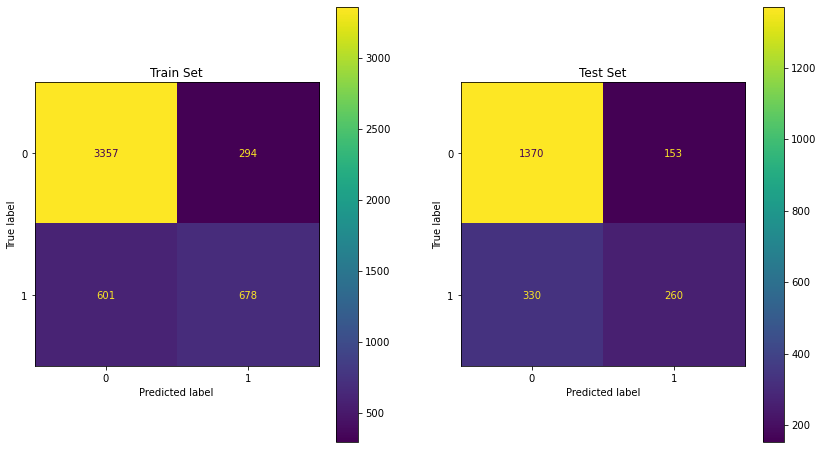

In [84]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(KNNClass,x_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(KNNClass,x_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

## Round 2

### Fit a Decision Tree Classifier on the training data.

In [85]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)

### Check the accuracy on the test data.

,Error_metric,Train,Test
0,Accuracy,0.873631,0.743019
1,Precision,0.794434,0.551648
2,Recall,0.691947,0.425424


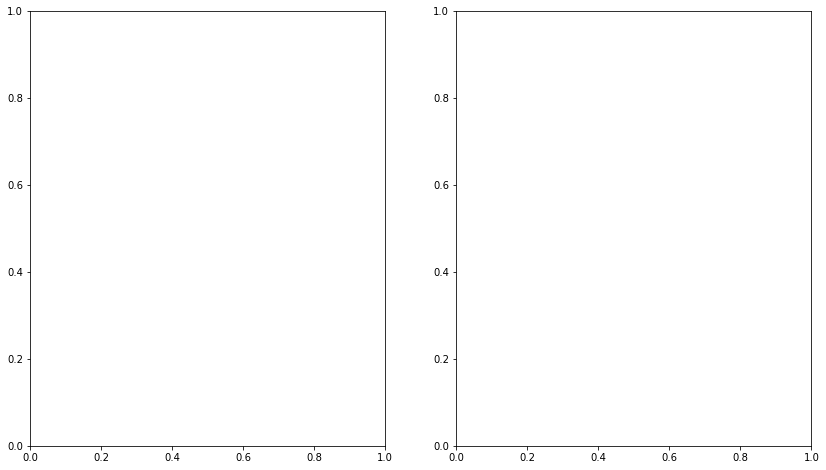

In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

tree.fit(x_train, y_train)

y_pred_train_dt = tree.predict(x_train)
y_pred_test_dt = tree.predict(x_test)

#Check performance of decision tree
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


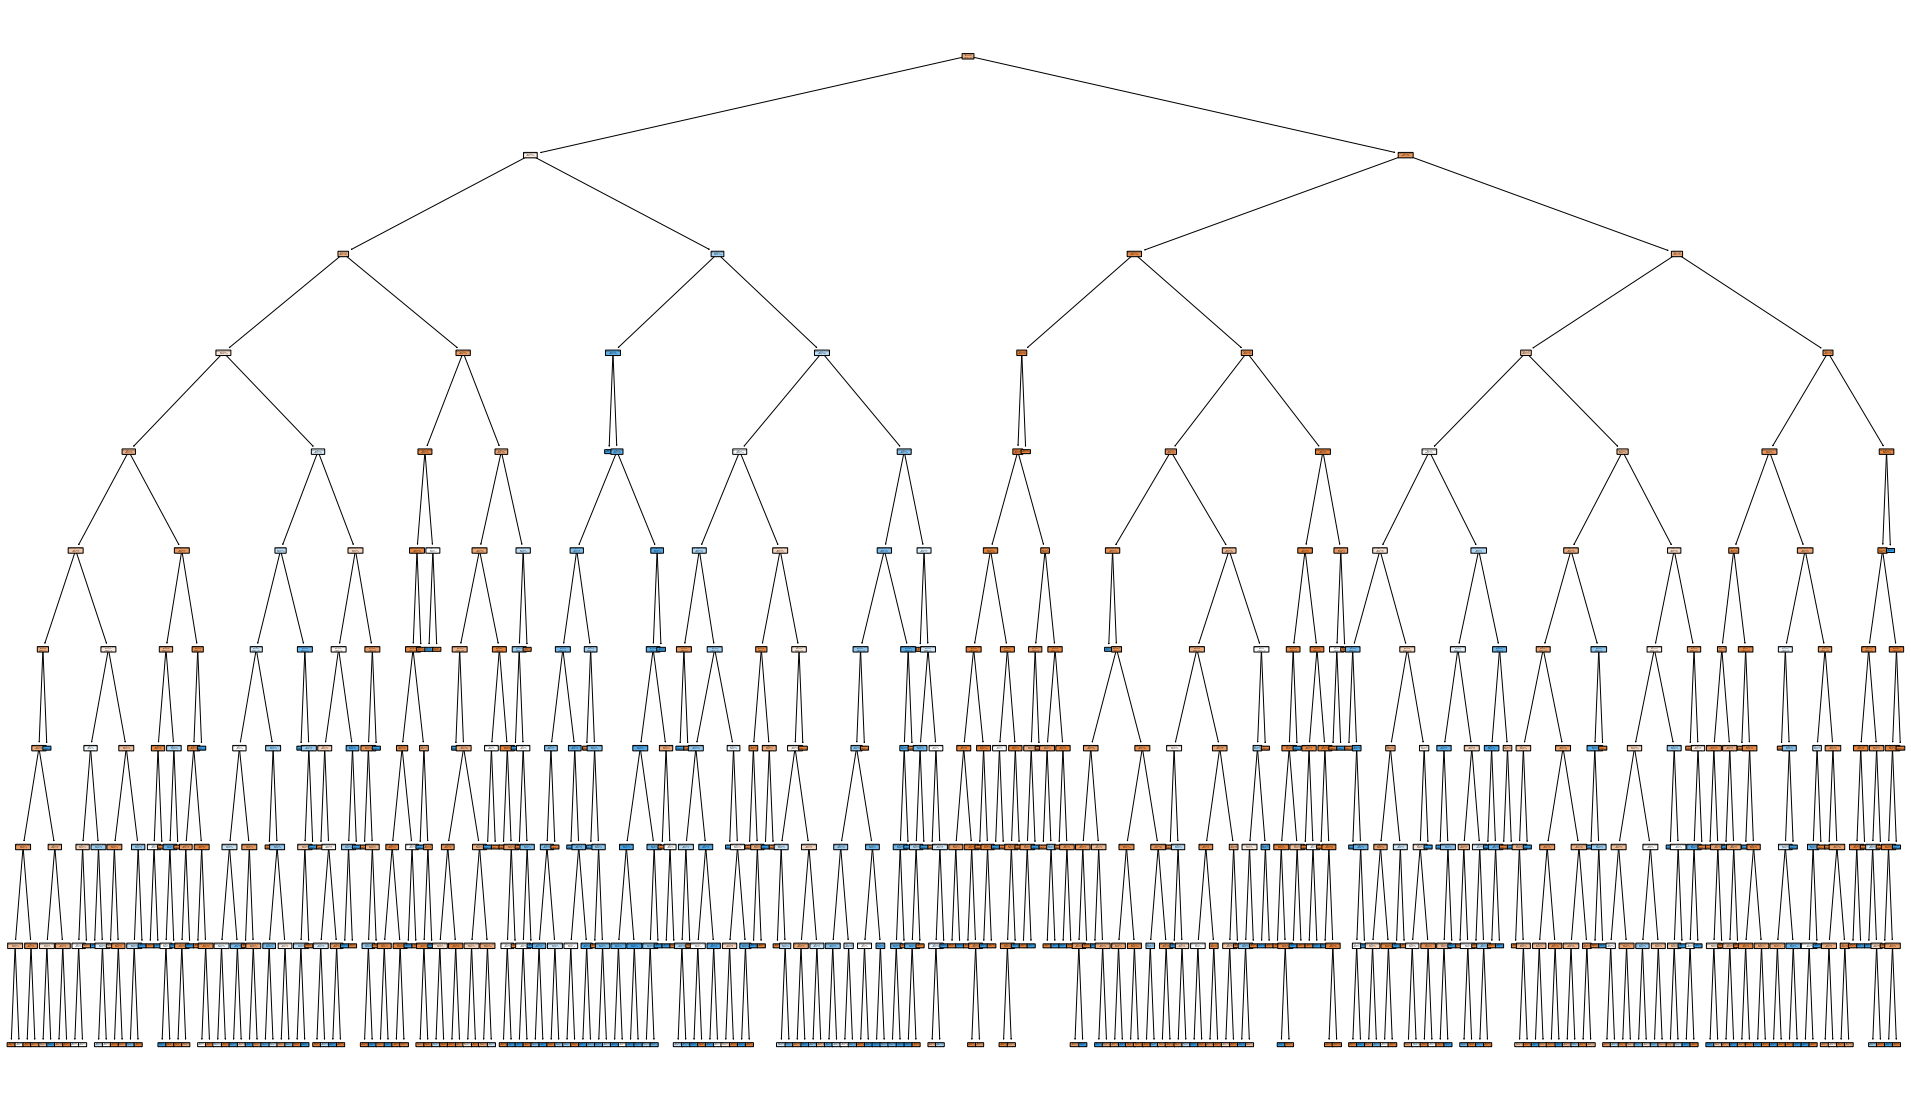

In [93]:
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(tree,filled = True, rounded=True,feature_names=x_train.columns)
plt.show() 

## Round 3

### apply K-fold cross validation on your models before and check the model score. Note: So far we have not balanced the data.

In [96]:
from sklearn. model_selection import cross_val_score 
from sklearn.linear_model import LogisticRegression

modelli = {
    
    "LogR": LogisticRegression(random_state=0),
    "KNeighborsClass":KNeighborsClassifier(n_neighbors=2),
    "DecisionTreeClassifier":DecisionTreeClassifier(max_depth=10)
} 

def cross_val(dict_models, X_train, y_train):
    for model , model_inst in dict_models.items():
        scores = cross_val_score(model_inst, x_train, y_train, cv=5) # cv = number of folds, or K
        print(f"{model_inst.__class__.__name__}: Scores -> {scores} ,ScoresMean -> {scores.mean()},ScoresStd -> {scores.std()}") #capting the 80% of variance in the mod
        

In [97]:
cross_val(modelli, x_train, y_train)

LogisticRegression: Scores -> [0.79918864 0.80223124 0.78701826 0.79411765 0.80324544] ,ScoresMean -> 0.7971602434077079,ScoresStd -> 0.0059829132672424455
KNeighborsClassifier: Scores -> [0.76470588 0.76572008 0.75456389 0.76369168 0.77180527] ,ScoresMean -> 0.7640973630831642,ScoresStd -> 0.005540162386915861
DecisionTreeClassifier: Scores -> [0.76470588 0.78600406 0.7484787  0.74442191 0.76369168] ,ScoresMean -> 0.7614604462474646,ScoresStd -> 0.014674723933213734


### Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

In [98]:
churnData_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [99]:
5174/len(churnData_new['Churn'])

0.7346301292063041

#### Downsampling

In [100]:
category_0 = churnData_new[churnData_new['Churn'] == 0]
category_1 = churnData_new[churnData_new['Churn'] == 1]
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [101]:
category_0_down = category_0.sample(len(category_1))
print(category_0_down.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [102]:
df_down = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
df_down = df_down.sample(frac=1)
df_down['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

#### Upsampling

In [103]:
df_up = churnData_new.drop(['Churn'], axis=1)
category_0 = df[df['Churn'] == 0]
category_1 = df[df['Churn'] == 1]

In [104]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 16)


In [105]:
category_1_up

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
5450,Male,0,No,No,1,Yes,No,No,No,No,Yes,No,Month-to-month,84.65,84.65,1
1132,Female,1,Yes,No,11,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.05,1133.65,1
630,Male,1,Yes,Yes,43,Yes,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,110.75,4687.90,1
2797,Male,0,No,No,3,Yes,No,No,Yes,No,Yes,Yes,Month-to-month,100.95,329.95,1
248,Male,0,No,No,1,Yes,Yes,No,No,No,No,No,Month-to-month,48.55,48.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,Female,1,Yes,Yes,72,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,92.45,6440.25,1
177,Female,1,No,No,7,Yes,Yes,No,No,No,No,No,Month-to-month,76.45,503.60,1
1519,Female,0,No,No,2,No,Yes,Yes,No,No,No,Yes,Month-to-month,42.60,72.40,1
492,Female,0,Yes,No,2,Yes,Yes,No,No,No,No,No,Month-to-month,74.40,139.40,1


In [106]:
df_up = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
df_up = df_up.sample(frac=1)
df_up['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [107]:
category_1_up.shape

(5174, 16)

#### SMOTE

In [108]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_smote = df_down.drop(['Churn'], axis=1)
y = churnData_new['Churn']
x = churnData_new.drop(['Churn'], axis=1)
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Round 4

### fit a Random forest Classifier on the data and compare the accuracy.

In [110]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8150101419878296
0.7704685281590156


In [111]:
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5)
cross_val_scores

array([0.79817444, 0.80933063, 0.78194726, 0.79310345, 0.79918864])

In [112]:
np.std(cross_val_scores)

0.008920338104379737

### tune the hyper paramters with gridsearch and check the results.

In [113]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    }
clf = RandomForestClassifier(random_state=100)

In [114]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [115]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [116]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.261925,0.007353,0.011894,0.002969,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.770791,...,0.771197,0.013310,12,0.990872,0.988590,0.990872,0.993154,0.989351,0.990568,0.001566
1,0.527192,0.031338,0.024988,0.003869,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.778905,...,0.774442,0.012918,10,0.991126,0.989604,0.992140,0.993408,0.989604,0.991176,0.001473
2,2.691831,0.084308,0.120545,0.004378,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.779919,...,0.774239,0.013341,11,0.991633,0.989858,0.992140,0.993408,0.989604,0.991329,0.001429
3,0.281045,0.010462,0.014816,0.002048,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.784990,...,0.778296,0.014775,9,0.970081,0.967799,0.970842,0.971349,0.967546,0.969523,0.001566
4,0.516044,0.013460,0.025650,0.004318,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.779919,...,0.779919,0.013485,7,0.973377,0.971856,0.971856,0.974138,0.970335,0.972312,0.001326
5,2.626103,0.043054,0.112799,0.002658,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.779919,...,0.779108,0.014952,8,0.979462,0.977434,0.978195,0.978955,0.975913,0.977992,0.001246
6,0.259316,0.016650,0.013465,0.002250,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.781947,...,0.785193,0.009458,3,0.934838,0.931288,0.934584,0.933316,0.934331,0.933671,0.001299
7,0.531374,0.028465,0.025035,0.002250,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.783976,...,0.786613,0.010878,1,0.931542,0.936359,0.936613,0.938387,0.935598,0.935700,0.002271
8,2.505975,0.073844,0.113883,0.007471,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.778905,...,0.784787,0.013152,5,0.933316,0.934584,0.935091,0.939402,0.934331,0.935345,0.002109
9,0.260798,0.017206,0.011582,0.003276,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.781947,...,0.785193,0.009458,3,0.934838,0.931288,0.934584,0.933316,0.934331,0.933671,0.001299


In [119]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7718052738336714


In [123]:
clf.fit( x_train, y_train)

RandomForestClassifier(max_features='sqrt', random_state=0)

In [124]:
feature_names = x_train.columns
feature_names = list(feature_names)

df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.382643
3,TotalCharges,0.356387
1,tenure,0.233518
0,SeniorCitizen,0.027451


In [125]:
clf.feature_importances_

array([0.02745118, 0.23351824, 0.38264329, 0.35638729])